#### Importando os dados da base:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

microdados = pd.read_csv("MICRODADOS_ENEM_2021.csv", sep=";" , encoding="ISO-8859-1")

In [2]:
microdados.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC',
       'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TX_GABARITO_CN', 'TX_GABARITO_CH',
       'TX_GABARITO_LC', 'TX_GABARITO_MT', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',

A base originalmente ocupa 1,9GB:

In [3]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389832 entries, 0 to 3389831
Data columns (total 76 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

In [4]:
presenca = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', "TP_STATUS_REDACAO"]

for i in presenca:
    microdados = microdados[microdados[i] == 1]

microdados = microdados.drop(labels = presenca , axis = 1)
    
microdados = microdados.reset_index(drop = True)

#### A base já ocupa 1,2GB após a retirada de candidatos que tenham faltado ou sido eliminados de qualquer uma das provas:

In [5]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175444 entries, 0 to 2175443
Data columns (total 71 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   NU_ANO                  int64  
 2   TP_FAIXA_ETARIA         int64  
 3   TP_SEXO                 object 
 4   TP_ESTADO_CIVIL         int64  
 5   TP_COR_RACA             int64  
 6   TP_NACIONALIDADE        int64  
 7   TP_ST_CONCLUSAO         int64  
 8   TP_ANO_CONCLUIU         int64  
 9   TP_ESCOLA               int64  
 10  TP_ENSINO               float64
 11  IN_TREINEIRO            int64  
 12  CO_MUNICIPIO_ESC        float64
 13  NO_MUNICIPIO_ESC        object 
 14  CO_UF_ESC               float64
 15  SG_UF_ESC               object 
 16  TP_DEPENDENCIA_ADM_ESC  float64
 17  TP_LOCALIZACAO_ESC      float64
 18  TP_SIT_FUNC_ESC         float64
 19  CO_MUNICIPIO_PROVA      int64  
 20  NO_MUNICIPIO_PROVA      object 
 21  CO_UF_PROVA             int64  

#### A seguir deixo somente as colunas interessam à análise e crio a coluna média das notas:

In [6]:
selectcolumns = ['NU_INSCRICAO', 'TP_FAIXA_ETARIA', 'TP_SEXO', 
       'TP_COR_RACA', 'TP_NACIONALIDADE',
       'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC',
       'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC',
       'NU_NOTA_MT', 'TP_LINGUA',
       'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q006',
       'Q022', 'Q024', 'Q025']

microdados = microdados.filter(items = selectcolumns)

notas = ['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']


#Abaixo é criada a coluna que contém a média das cinco provas

microdados['Média'] = microdados[notas].mean(axis = 1)

#### A base já pesa menos de 500Mb

In [7]:
microdados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175444 entries, 0 to 2175443
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   NU_INSCRICAO            int64  
 1   TP_FAIXA_ETARIA         int64  
 2   TP_SEXO                 object 
 3   TP_COR_RACA             int64  
 4   TP_NACIONALIDADE        int64  
 5   TP_ESCOLA               int64  
 6   TP_ENSINO               float64
 7   IN_TREINEIRO            int64  
 8   NO_MUNICIPIO_ESC        object 
 9   SG_UF_ESC               object 
 10  TP_DEPENDENCIA_ADM_ESC  float64
 11  TP_LOCALIZACAO_ESC      float64
 12  NU_NOTA_CN              float64
 13  NU_NOTA_CH              float64
 14  NU_NOTA_LC              float64
 15  NU_NOTA_MT              float64
 16  TP_LINGUA               int64  
 17  NU_NOTA_REDACAO         float64
 18  Q001                    object 
 19  Q002                    object 
 20  Q006                    object 
 21  Q022                    object 

Candidatos provenientes de escolas públicas e privadas obtêm o mesmo desempenho?
==============================================================================
#### **H<sub>0</sub>** = Candidatos provenientes de escolas públicas e privadas obtêm o mesmo desempenho 
#### **H<sub>A</sub>** = Candidatos provenientes de escolas privadas obtêm **melhor** desempenho que candidatos de escolas públicas

Text(0, 0.5, ' ')

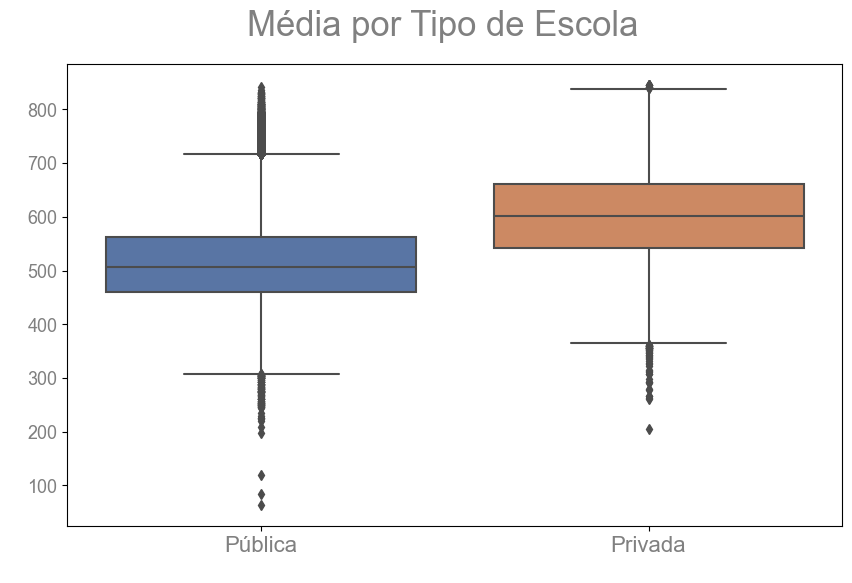

In [8]:
fig, ax = plt.subplots(figsize = (10,6))
sns.set_theme(style="whitegrid")
fig.suptitle('Média por Tipo de Escola', fontsize = 25, color = 'grey', y = 0.97)
ax = sns.boxplot(data = microdados[microdados['TP_ESCOLA'] != 1], x = 'TP_ESCOLA', y = 'Média')
ax.set_xticklabels(['Pública','Privada'], fontsize = 16, color = 'grey')
ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### **epub** contém os dados de alunos de escola pública
#### **epri** contém os dados de alunos de escola privada

In [9]:
epub = microdados[microdados['TP_ESCOLA'] == 2]
epri = microdados[microdados['TP_ESCOLA'] == 3]

In [10]:
epub['Média'].mean()

515.7145031742084

In [11]:
epub['Média'].std()

73.85058723183762

In [12]:
epri['Média'].mean()

600.4003299536681

In [13]:
epri['Média'].std()

80.99117436406097

Text(0, 0.5, ' ')

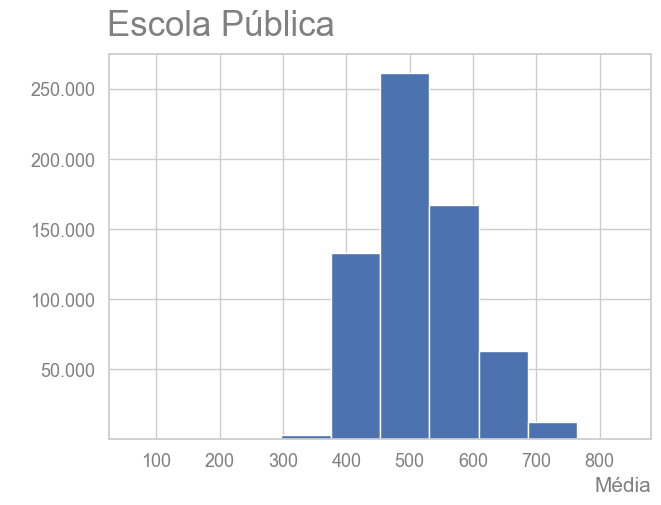

In [14]:
fig, ax = plt.subplots(figsize = (7,5))
plt.suptitle('Escola Pública', color = 'grey', fontsize = 25, y = 0.97, x = 0.285)
ax = plt.hist(epub['Média'])
plt.xticks([100,200,300,400,500,600,700,800],labels = ['100','200','300','400','500','600','700','800'], color = 'grey', fontsize = 13)
plt.yticks([50000,100000,150000,200000,250000], labels = ['50.000','100.000','150.000','200.000','250.000'], color = 'grey', fontsize = 13)
plt.xlabel('Média', color = 'grey', fontsize = 15, loc = 'right')
plt.ylabel(' ')

#### QQplot para verificar a normalidade dos dados:

Text(0, 0.5, ' ')

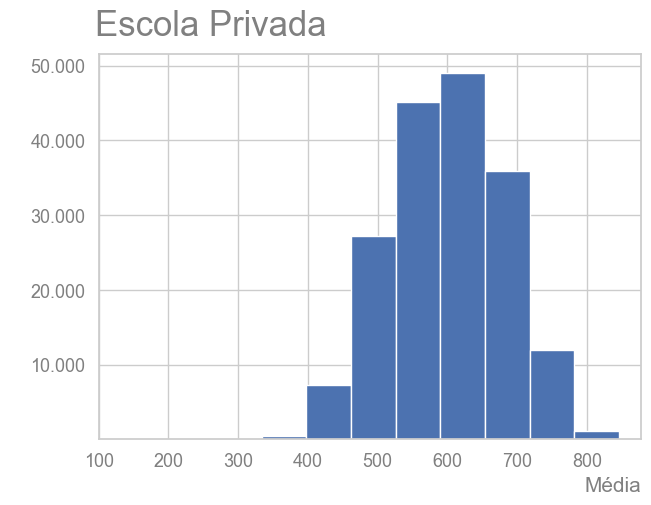

In [15]:
fig, ax = plt.subplots(figsize = (7,5))
plt.suptitle('Escola Privada', color = 'grey', fontsize = 25, y = 0.97, x = 0.285)
ax = plt.hist(epri['Média'])
plt.xticks([100,200,300,400,500,600,700,800],labels = ['100','200','300','400','500','600','700','800'], color = 'grey', fontsize = 13)
plt.yticks([10000,20000,30000,40000,50000], labels = ['10.000','20.000','30.000','40.000','50.000'], color = 'grey', fontsize = 13)
plt.xlabel('Média', color = 'grey', fontsize = 15, loc = 'right')
plt.ylabel(' ')

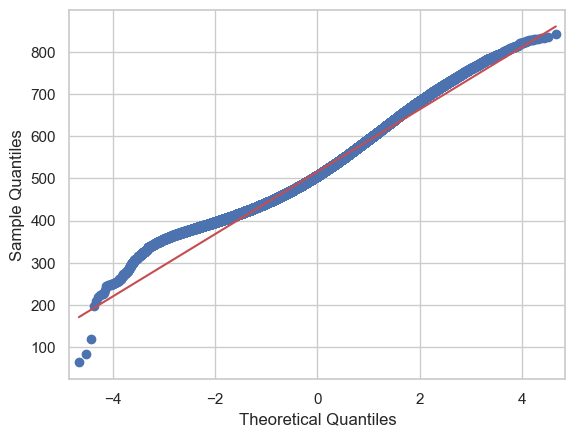

In [16]:
qqplot(epub['Média'], line = 's')
plt.show()

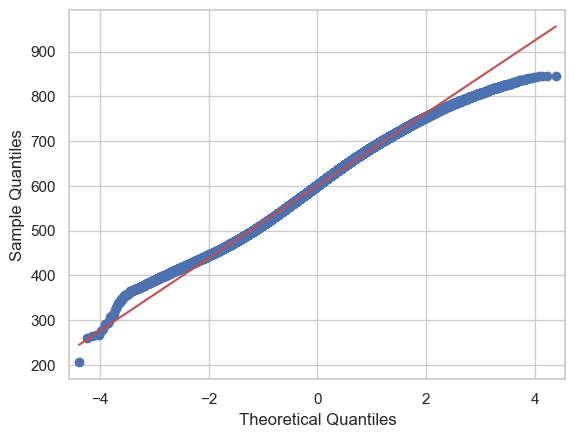

In [17]:
qqplot(epri['Média'], line = 's')
plt.show()

In [18]:
t0, p0 = stats.ttest_ind(epub['Média'], epri['Média'], alternative='less', equal_var = False)

In [19]:
t0

-397.6635350468472

In [20]:
p0

0.0

#### Obtidos T-valor e P-valor para a as amostras de estudantes de escolas públicas e privadas podemos <u>rejeitar</u> a hipótese nula de que candidatos de escolas públicas e privadas tem o mesmo desempenho

Quanto maior a renda familiar melhor o desempenho?
==================
#### **H<sub>0</sub>**: Candidatos de diferentes faixas de renda obtêm o mesmo desempenho
#### **H<sub>A</sub>**: Candidatos com maiores rendas obtém **melhor** desempenho

In [21]:
renda = microdados['Q006']

Text(0, 0.5, ' ')

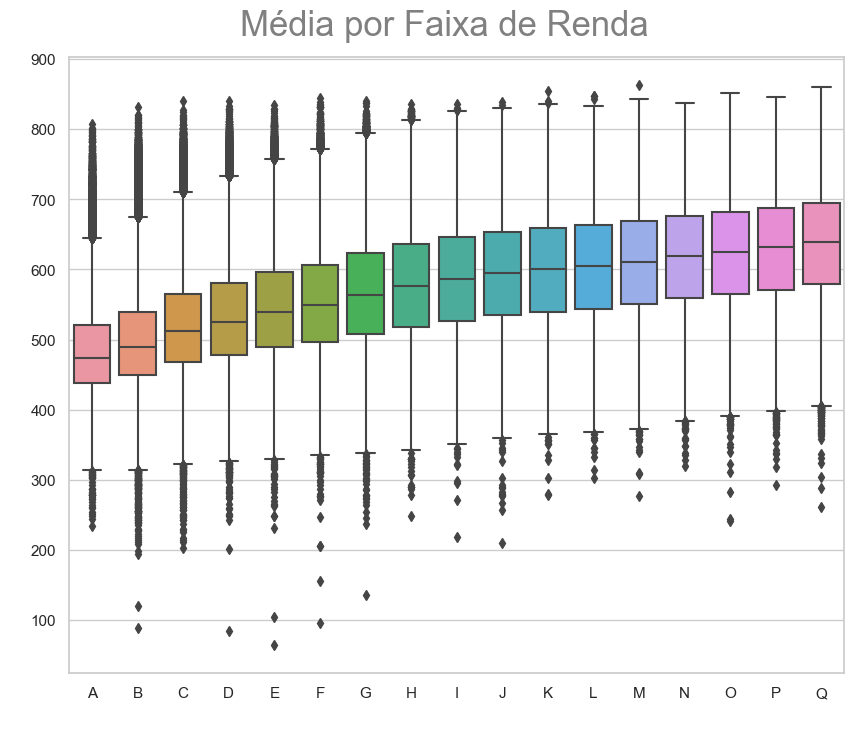

In [22]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = microdados.sort_values(by = 'Q006'), x ='Q006', y ='Média')
fig.suptitle('Média por Faixa de Renda', fontsize = 25, color = 'grey', y = 0.94)
#ax.set_xticklabels(['Baixa','Média','Alta'], fontsize = 15, color = 'grey')
#ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### Vamos modificar as categorias da Questão 06 para que em vez de 20 categorias tenha apenas 3:

In [23]:
def catrenda(dado):
    if dado == 'A': return 'Baixa'
    elif dado == 'B': return 'Baixa'
    elif dado == 'C': return 'Baixa'
    elif dado == 'D': return 'Baixa'
    elif dado == 'E': return 'Baixa'
    elif dado == 'F': return 'Baixa'
    elif dado == 'G': return 'Média'
    elif dado == 'H': return 'Média'
    elif dado == 'I': return 'Média'
    elif dado == 'J': return 'Média'
    elif dado == 'K': return 'Média'
    elif dado == 'L': return 'Média'
    else: return 'Alta'

In [24]:
renda = renda.apply(catrenda)

In [25]:
microdados['Q006'] = renda

Text(0, 0.5, ' ')

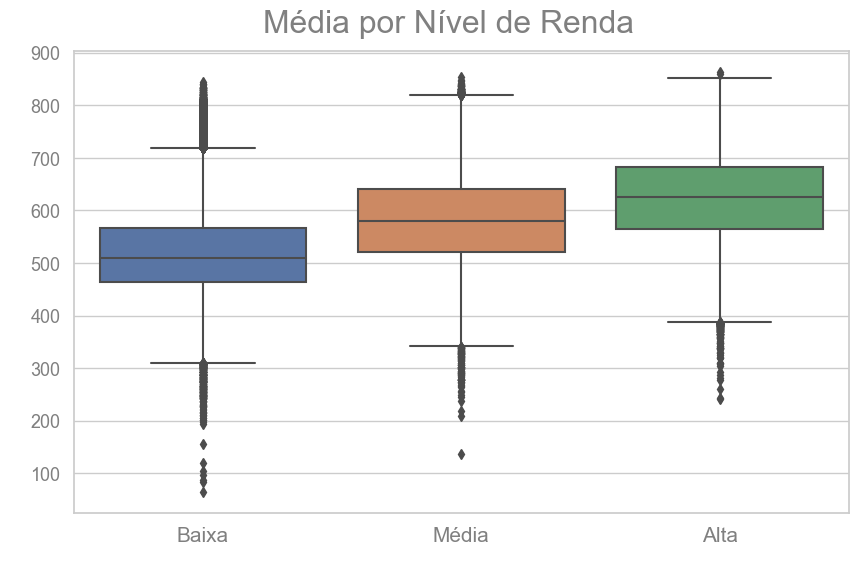

In [26]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.boxplot(data = microdados, x ='Q006', y ='Média')
fig.suptitle('Média por Nível de Renda', fontsize = 23, color = 'grey', y = 0.95)
ax.set_xticklabels(['Baixa','Média','Alta'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

#### Para não prolongar desnecessariamente a comparação as 17 categorias que representavam as 17 faixas de renda foram reduzidas a 3 categorias para facilitar a comparação.
#### **brenda** contém os dados de candidatos de baixa renda
#### **mrenda** contém os dados de candidatos de média renda
#### **arenda** contém os dados de candidatos de alta renda

In [27]:
brenda = microdados[microdados['Q006'] == 'Baixa']

In [28]:
brenda['Média'].mean()

519.1139623796248

In [29]:
brenda['Média'].std()

74.7145386543728

Text(0, 0.5, ' ')

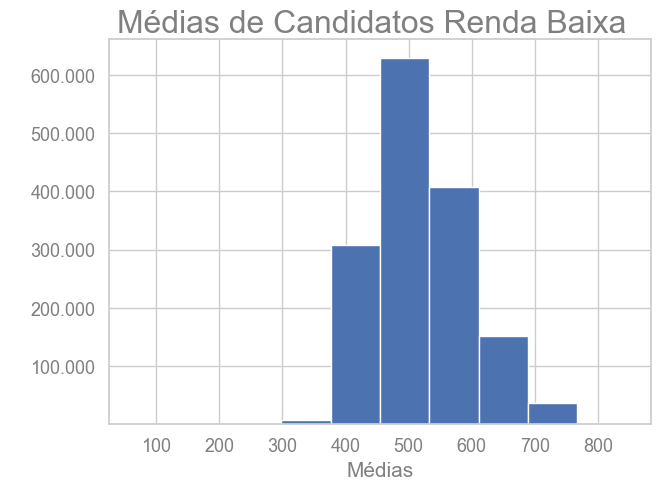

In [30]:
fig, ax = plt.subplots(figsize = (7,5))
ax = plt.hist(brenda['Média'])
plt.suptitle('Médias de Candidatos Renda Baixa', color = 'grey', fontsize = 23, y = 0.94)
plt.xticks([100,200,300,400,500,600,700,800],labels = ['100','200','300','400','500','600','700','800'], color = 'grey', fontsize = 13)
plt.yticks([100000,200000,300000,400000,500000,600000], labels = ['100.000','200.000','300.000','400.000','500.000','600.000'], color = 'grey', fontsize = 13)
plt.xlabel('Médias', color = 'grey', fontsize = 15)
plt.ylabel(' ')

In [31]:
mrenda = microdados[microdados['Q006'] == 'Média']

In [32]:
mrenda['Média'].mean()

581.7505644532692

In [33]:
mrenda['Média'].std()

82.07807667560537

Text(0, 0.5, ' ')

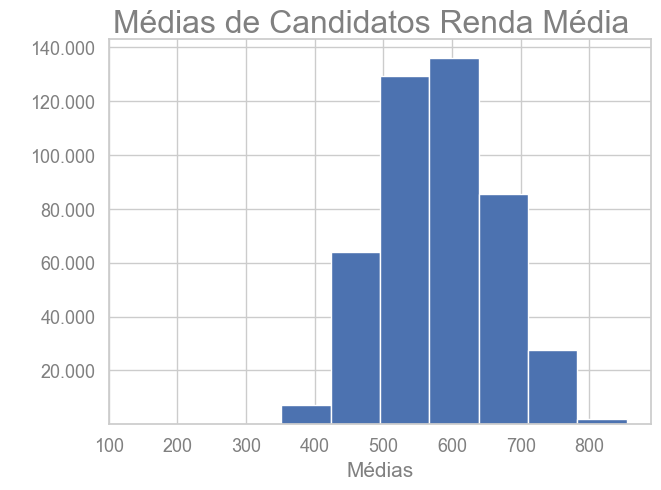

In [34]:
fig, ax = plt.subplots(figsize = (7,5))
ax = plt.hist(mrenda['Média'])
plt.suptitle('Médias de Candidatos Renda Média', color = 'grey', fontsize = 23, y = 0.94)
plt.xticks([100,200,300,400,500,600,700,800],labels = ['100','200','300','400','500','600','700','800'], color = 'grey', fontsize = 13)
plt.yticks([20000,40000,60000,80000,100000,120000,140000], labels = ['20.000','40.000','60.000','80.000','100.000','120.000','140.000'], color = 'grey', fontsize = 13)
plt.xlabel('Médias', color = 'grey', fontsize = 15)
plt.ylabel(' ')

In [35]:
arenda = microdados[microdados['Q006'] == 'Alta']

In [36]:
arenda['Média'].mean()

621.428146236849

In [37]:
arenda['Média'].std()

82.35687241973882

Text(0, 0.5, ' ')

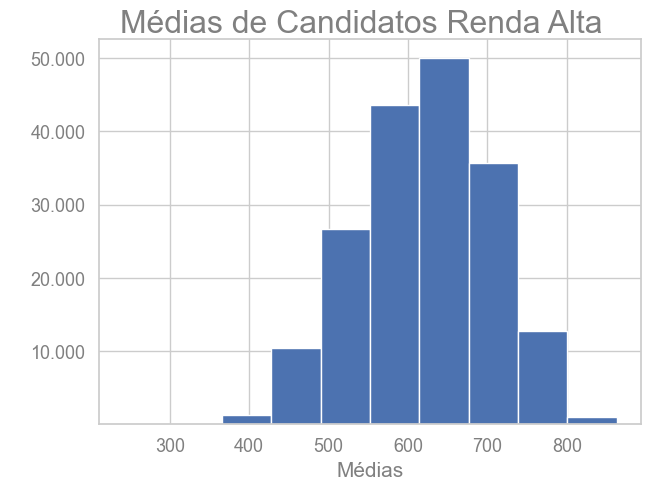

In [38]:
fig, ax = plt.subplots(figsize = (7,5))
ax = plt.hist(arenda['Média'])
plt.suptitle('Médias de Candidatos Renda Alta', color = 'grey', fontsize = 23, y = 0.94)
plt.xticks([300,400,500,600,700,800],labels = ['300','400','500','600','700','800'], color = 'grey', fontsize = 13)
plt.yticks([10000,20000,30000,40000,50000], labels = ['10.000','20.000','30.000','40.000','50.000'], color = 'grey', fontsize = 13)
plt.xlabel('Médias', color = 'grey', fontsize = 15)
plt.ylabel(' ')

#### QQ Plot para verificar a normalidade dos dados

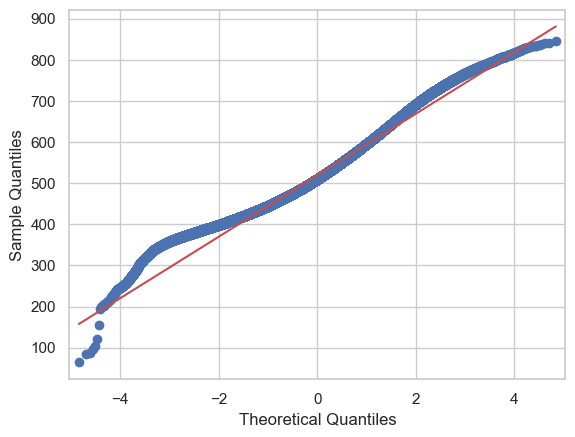

In [39]:
qqplot(brenda['Média'], line = 's')
plt.show()

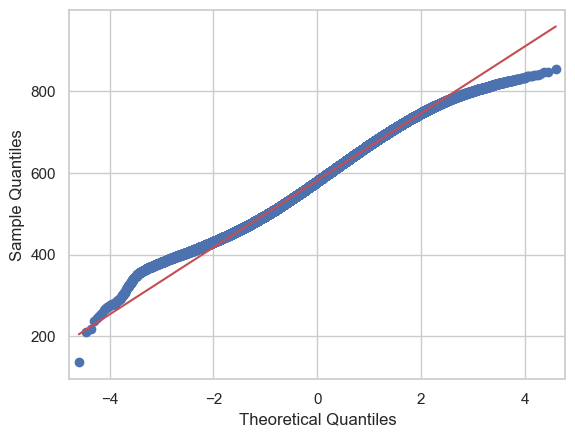

In [40]:
qqplot(mrenda['Média'], line = 's')
plt.show()

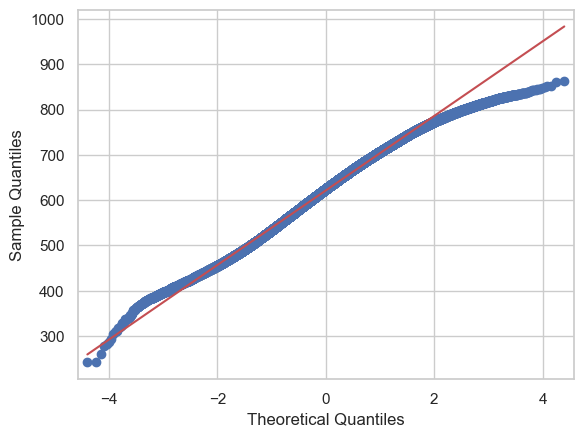

In [41]:
qqplot(arenda['Média'], line = 's')
plt.show()

#### Verificado a normalidade dos dados, agora podemos calcular T-valor e P-valor de cada comparação

#### Baixa e Média Renda:

In [42]:
t1, p1 = stats.ttest_ind(brenda['Média'], mrenda['Média'], alternative='less', equal_var = False)

In [43]:
t1

-460.0391019567902

In [44]:
p1

0.0

#### Média e Alta Renda:

In [45]:
t2, p2 = stats.ttest_ind(mrenda['Média'], arenda['Média'], alternative='less', equal_var = False)

In [46]:
t2

-173.4737815142831

In [47]:
p2

0.0

#### Obtidos T-valor e P-valor para cada comparação de amostras de estudantes de diferentes faixas de renda podemos <u>rejeitar</u> a hipótese nula de que candidatos de diferentes faixas de renda possuem mesmo desempenho

A escolaridade dos pais influencia no desempenho dos candidatos?
=========
#### **H<sub>0</sub>**: Candidatos cujos pais tem diferentes níveis de escolaridade obtém mesmo desempenho
#### **H<sub>A</sub>**: Candidatos cujos pais tem maior nível de escolaridade obtém **melhor** desempenho

Text(0, 0.5, 'Média')

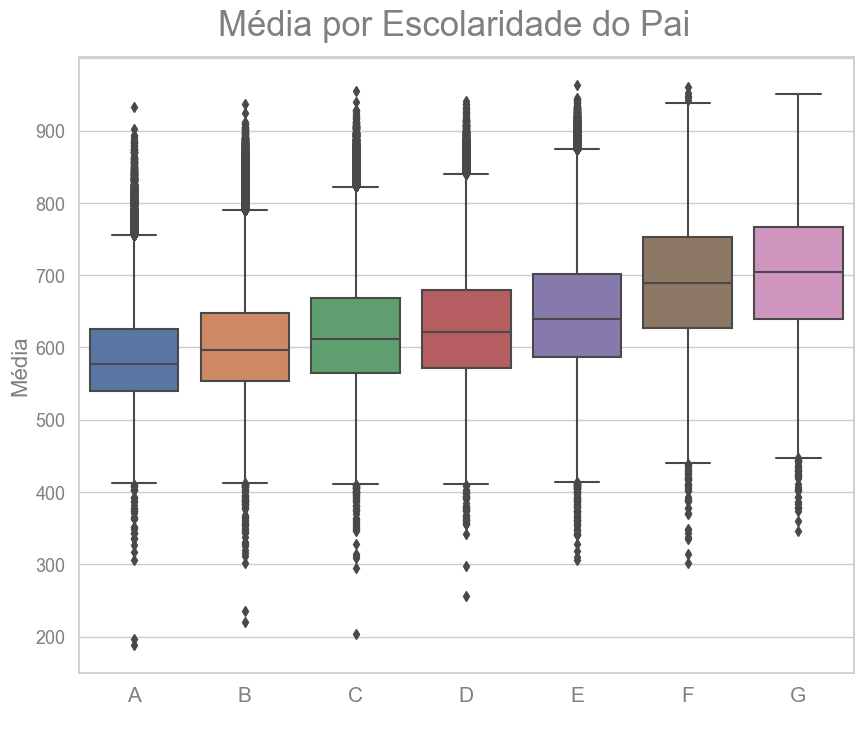

In [48]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = microdados[microdados['Q001'] != 'H'].sort_values(by = 'Q001'), x ='Q001', y = 'Média')
fig.suptitle('Média por Escolaridade do Pai', fontsize = 25, color = 'grey', y = 0.94)
ax.set_xticklabels(['A','B','C','D','E','F','G'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel('Média', fontsize = 16, color = 'grey')

Text(0, 0.5, 'Média')

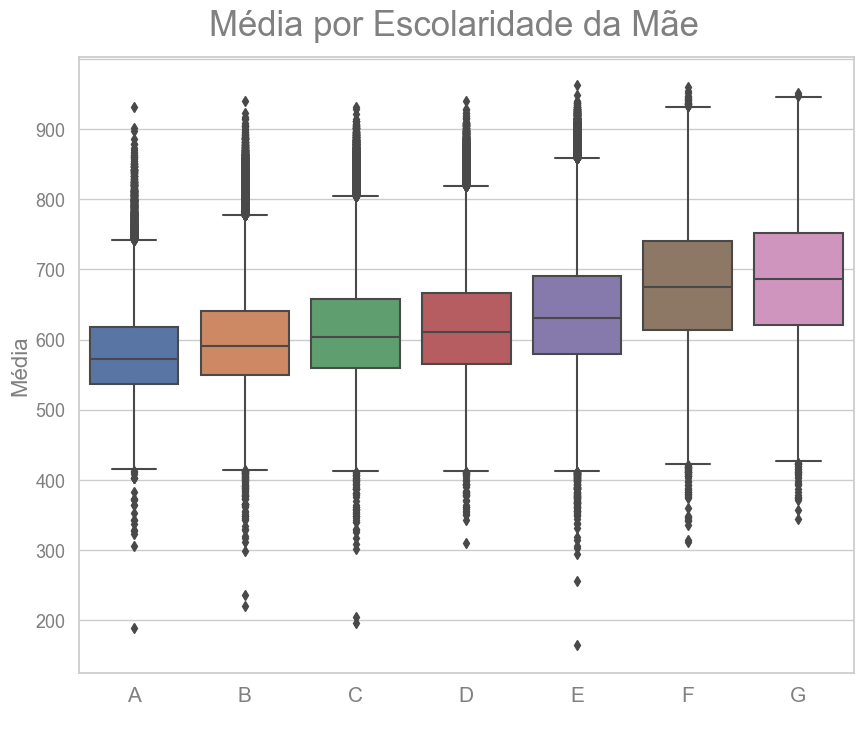

In [49]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.boxplot(data = microdados[microdados['Q002'] != 'H'].sort_values(by = 'Q002'), x ='Q002', y = 'Média')
fig.suptitle('Média por Escolaridade da Mãe', fontsize = 25, color = 'grey', y = 0.94)
ax.set_xticklabels(['A','B','C','D','E','F','G'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel('Média', fontsize = 16, color = 'grey')

Text(0, 0, 'Mil')

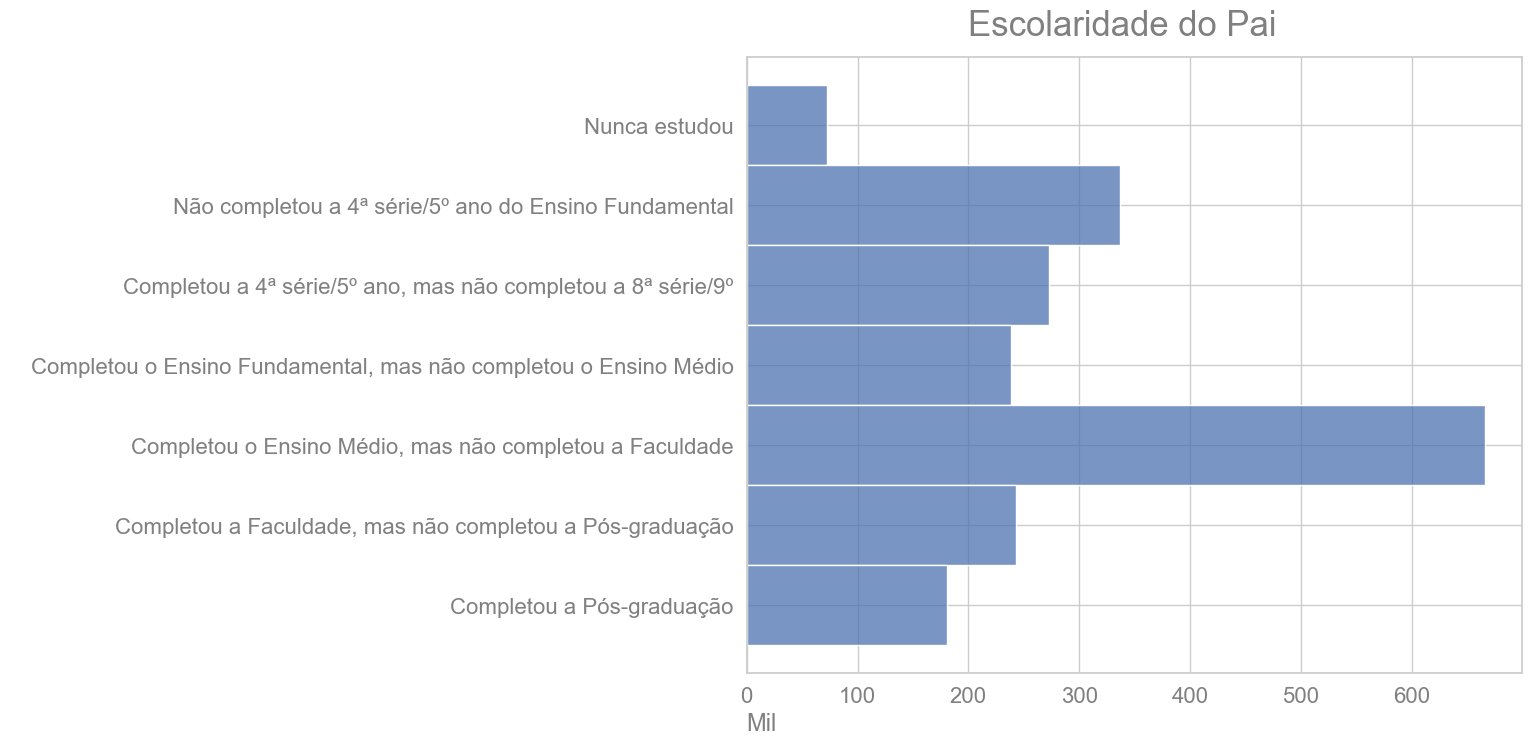

In [50]:
fig, ax = plt.subplots(figsize = (10,8))
fig.suptitle('Escolaridade do Pai', fontsize = 25, color = 'grey', y = 0.94)
ax = sns.histplot(y ='Q001', data= microdados[microdados['Q001'] != 'H'].sort_values(by = 'Q001'))
ax.set_yticklabels(['Nunca estudou', 
         'Não completou a 4ª série/5º ano do Ensino Fundamental', 
         'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º', 
         'Completou o Ensino Fundamental, mas não completou o Ensino Médio', 
         'Completou o Ensino Médio, mas não completou a Faculdade', 
         'Completou a Faculdade, mas não completou a Pós-graduação', 
         'Completou a Pós-graduação', 
         'Não sei'], color = 'grey', fontsize = 16)
ax.set_xticklabels(['0','100','200','300','400','500','600'],fontsize = 16, color = 'grey')
ax.set_ylabel(' ')
ax.set_xlabel('Mil', color = 'grey', fontsize = 17,loc = 'left')

Text(0, 0, 'Mil')

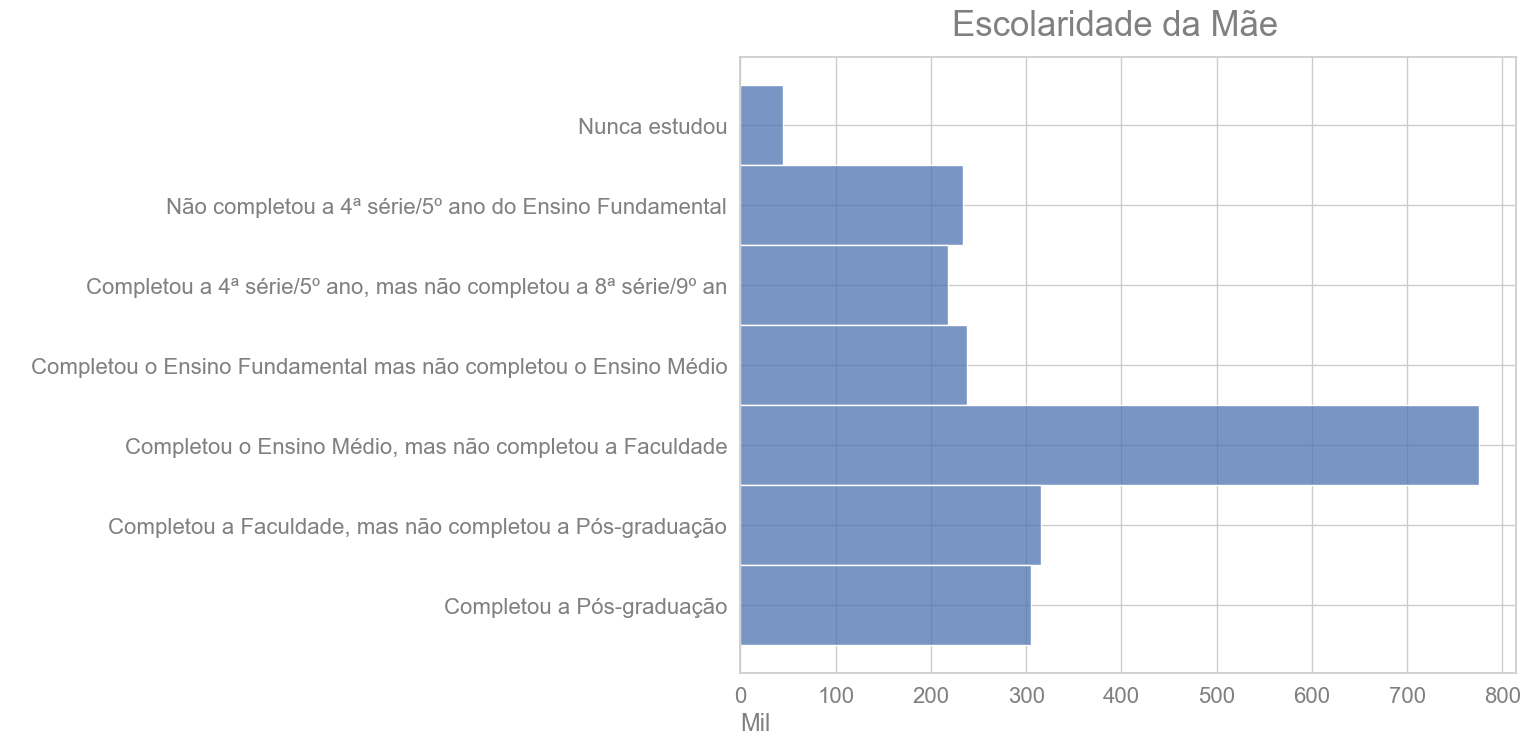

In [51]:
fig, ax = plt.subplots(figsize = (10,8))
fig.suptitle('Escolaridade da Mãe', fontsize = 25, color = 'grey', y = 0.94)
ax = sns.histplot(y ='Q002', data= microdados[microdados['Q002'] != 'H'].sort_values(by = 'Q002'))
ax.set_yticklabels(['Nunca estudou', 
         'Não completou a 4ª série/5º ano do Ensino Fundamental', 
         'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º an', 
         'Completou o Ensino Fundamental mas não completou o Ensino Médio', 
         'Completou o Ensino Médio, mas não completou a Faculdade', 
         'Completou a Faculdade, mas não completou a Pós-graduação', 
         'Completou a Pós-graduação', 
         'Não sei'], color = 'grey', fontsize = 16)
ax.set_xticklabels(['0','100','200','300','400','500','600','700','800'],fontsize = 16, color = 'grey')
ax.set_ylabel(' ')
ax.set_xlabel('Mil', color = 'grey', fontsize = 17, loc = 'left')

In [52]:
q001 = microdados[['Q001', 'Média']].sort_values(by = 'Q001')
q002 = microdados[['Q002', 'Média']].sort_values(by = 'Q002')

In [53]:
def catesc(dado):
    if dado == 'A': return 'Não estudou'
    elif dado == 'B': return 'Baixa'
    elif dado == 'C': return 'Baixa'
    elif dado == 'D': return 'Baixa'
    elif dado == 'E': return 'Média'
    else: return 'Alta'

In [54]:
q001['Q001'] = q001['Q001'].apply(catesc)

Text(0, 0.5, ' ')

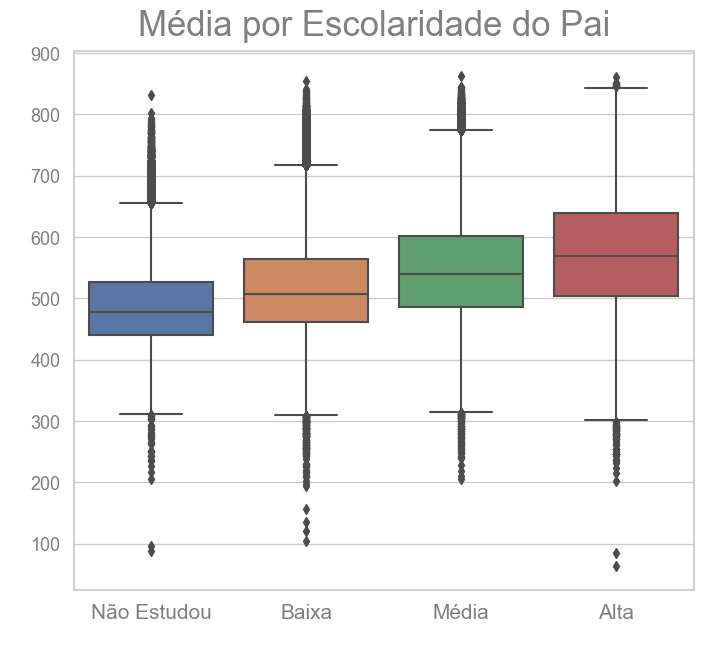

In [55]:
fig, ax = plt.subplots(figsize = (8,7))
fig.suptitle('Média por Escolaridade do Pai', fontsize = 25, color = 'grey', y = 0.94)
ax = sns.boxplot(data = q001[q001['Q001'] != 'H'], x ='Q001', y = 'Média')
ax.set_xticklabels(['Não Estudou','Baixa','Média','Alta'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

Text(0, 0.5, ' ')

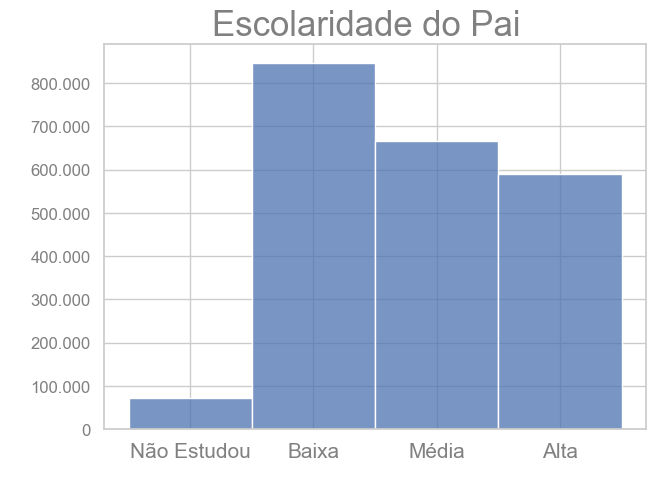

In [56]:
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.histplot(x ='Q001', data= q001)
fig.suptitle('Escolaridade do Pai', fontsize = 25, color = 'grey', y = 0.95)
ax.set_xticklabels(['Não Estudou','Baixa','Média','Alta'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['0','100.000','200.000','300.000','400.000','500.000','600.000','700.000','800.000',], fontsize = 12, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

In [57]:
q002['Q002'] = q002['Q002'].apply(catesc)

Text(0, 0.5, ' ')

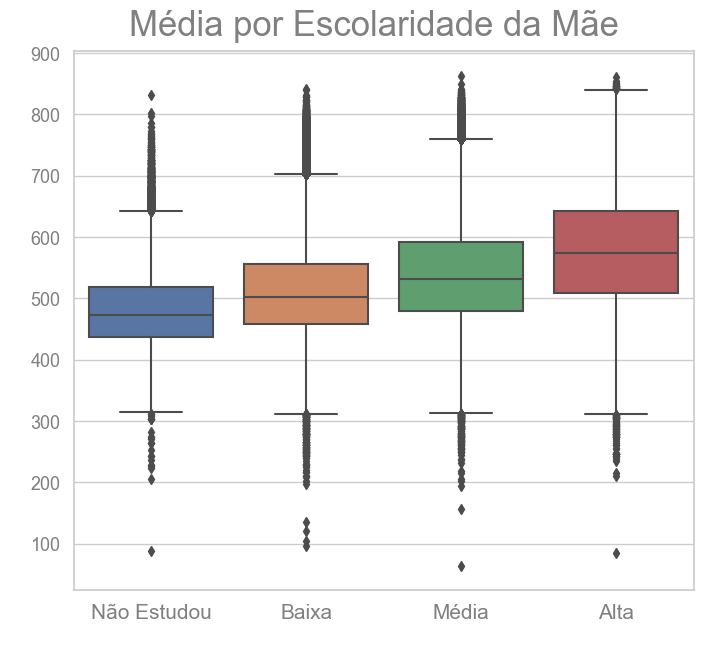

In [58]:
fig, ax = plt.subplots(figsize = (8,7))
fig.suptitle('Média por Escolaridade da Mãe', fontsize = 25, color = 'grey', y = 0.94)
ax = sns.boxplot(data = q002[q002['Q002'] != 'H'], x ='Q002', y = 'Média')
ax.set_xticklabels(['Não Estudou', 'Baixa','Média','Alta'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'],fontsize = 13, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

Text(0, 0.5, ' ')

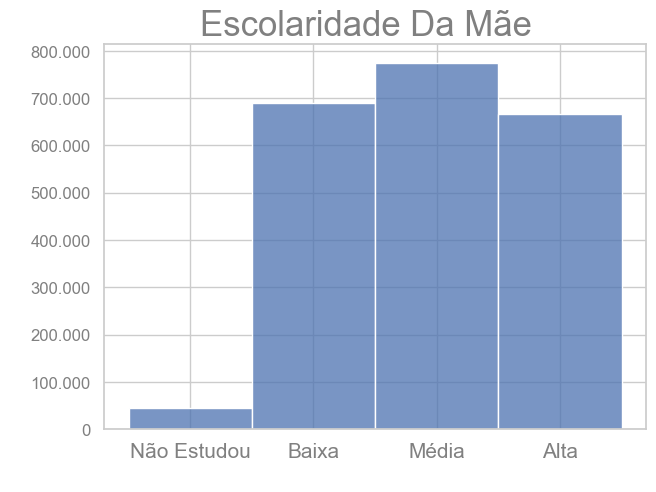

In [59]:
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.histplot(x ='Q002', data= q002)
fig.suptitle('Escolaridade Da Mãe', fontsize = 25, color = 'grey', y = 0.95)
ax.set_xticklabels(['Não Estudou','Baixa','Média','Alta'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['0','100.000','200.000','300.000','400.000','500.000','600.000','700.000','800.000',], fontsize = 12, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

In [60]:
q11 , q12, q13 , q14 = q001[q001['Q001'] == 'Não estudou'], q001[q001['Q001'] == 'Baixa'], q001[q001['Q001'] == 'Média'], q001[q001['Q001'] == 'Alta']

In [61]:
q21, q22, q23, q24 = q002[q002['Q002'] == 'Não estudou'], q002[q002['Q002'] == 'Baixa'], q002[q002['Q002'] == 'Média'], q002[q002['Q002'] == 'Alta']

#### **q11** contém dados de candidatos cujo pai Não estudou
#### **q12** contém dados de candidatos cujo pai tem Escolaridade Baixa
#### **q13** contém dados de candidatos cujo pai tem Escolaridade Média
#### **q14** contém dados de candidatos cujo pai tem Escolaridade Alta:
#### **q11** contém dados de candidatos cuja mãe Não estudou
#### **q12** contém dados de candidatos cuja mãe tem Escolaridade Baixa
#### **q13** contém dados de candidatos cuja mãe tem Escolaridade Média
#### **q14** contém dados de candidatos cuja mãe tem Escolaridade Alta:

#### QQplot para verificar a normalidade dos dados

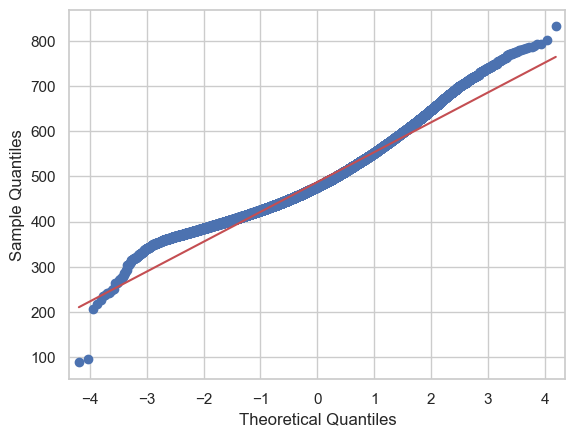

In [62]:
qqplot(q11['Média'], line = 's')
plt.show()

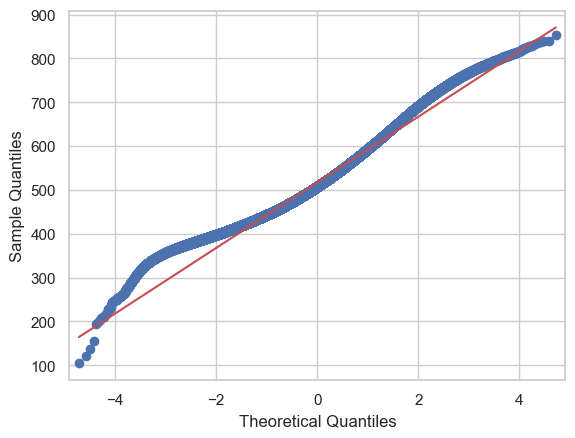

In [63]:
qqplot(q12['Média'], line = 's')
plt.show()

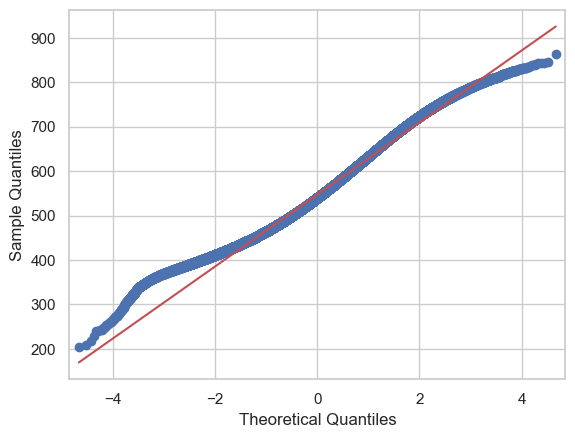

In [64]:
qqplot(q13['Média'], line = 's')
plt.show()

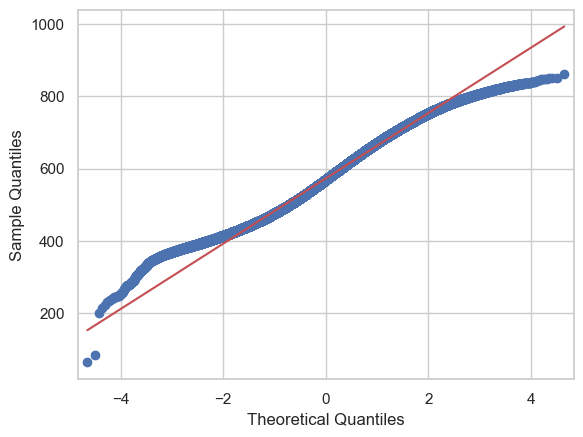

In [65]:
qqplot(q14['Média'], line = 's')
plt.show()

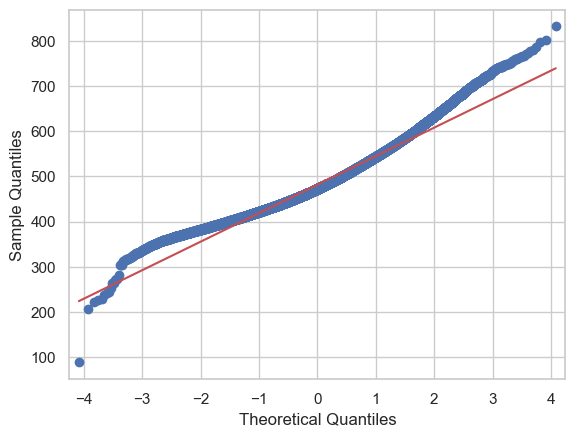

In [66]:
qqplot(q21['Média'], line = 's')
plt.show()

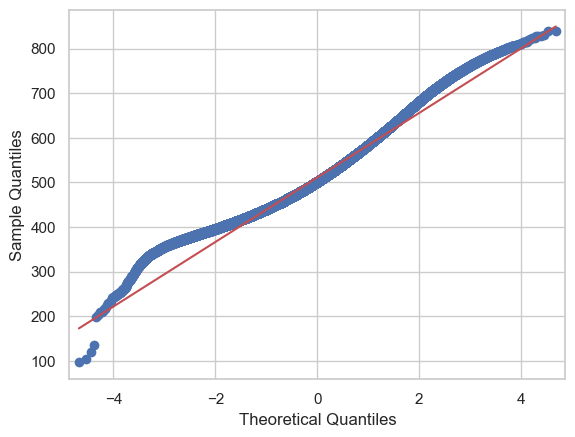

In [67]:
qqplot(q22['Média'], line = 's')
plt.show()

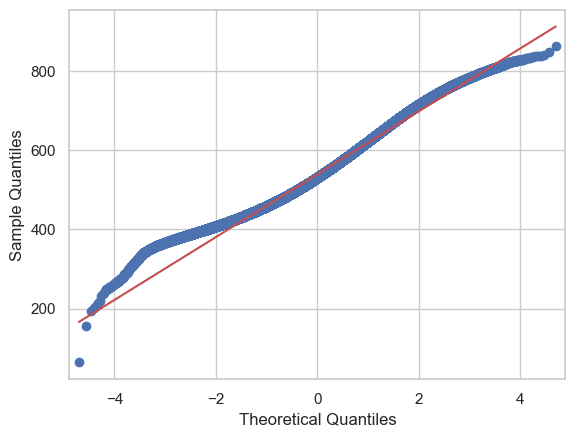

In [68]:
qqplot(q23['Média'], line = 's')
plt.show()

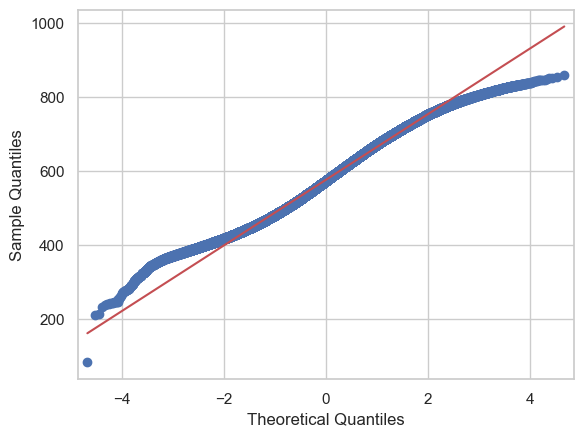

In [69]:
qqplot(q24['Média'], line = 's')
plt.show()

#### Executanto o teste

#### **Q001**:

Sem Estudo x Escolaridade Baixa

In [70]:
t3, p3 = stats.ttest_ind(q11['Média'], q12['Média'], alternative='less', equal_var = False)

In [71]:
t3

-115.57339235214276

In [72]:
p3

0.0

Escolaridade Baixa x Escolaridade Média:

In [73]:
t4, p4 = stats.ttest_ind(q12['Média'], q13['Média'], alternative='less', equal_var = False)

In [74]:
t4

-234.33228496582495

In [75]:
p4

0.0

Escolaridade Média x Escolaridade Alta:

In [76]:
t5, p5 = stats.ttest_ind(q13['Média'], q14['Média'], alternative='less', equal_var = False)

In [77]:
t5

-165.52388397909556

In [78]:
p5

0.0

#### **Q002**:

Sem Estudo x Escolaridade Baixa:

In [79]:
t6, p6 = stats.ttest_ind(q21['Média'], q22['Média'], alternative='less', equal_var = False)

In [80]:
t6

-95.05776155800879

In [81]:
p6

0.0

Escolaridade Baixa x Escolaridade Média:

In [82]:
t7, p7 = stats.ttest_ind(q22['Média'], q23['Média'], alternative='less', equal_var = False)

In [83]:
t7

-225.02770032505308

In [84]:
p7

0.0

Escolaridade Média x Escolaridade Alta:

In [85]:
t8, p8 = stats.ttest_ind(q23['Média'], q24['Média'], alternative='less', equal_var = False)

In [86]:
t8

-266.372630352415

In [87]:
p8

0.0

#### Obtidos T-valor e P-valor para cada comparação de amostras de candidatos com diferentes níveis de escolaridades dos pais podemos <u>rejeitar</u> a Hipótese Nula de que candidatos cujos pais tem diferentes níveis de escolaridade possuem mesmo desempenho

Candidatos com acesso à internet tem melhor desempenho?
=============
#### **H<sub>0</sub>**: Candidatos com acesso e sem acesso à internet obtém o mesmo desempenho 
#### **H<sub>A</sub>**: Candidatos com acesso à internet obtém **melhor** desempenho

In [88]:
q025 = microdados[['Q025','Média']]

In [89]:
def catint(dado):
    if dado == 'A': return 'Não'
    else: return 'Sim'

In [90]:
q025['Q025'] = q025['Q025'].apply(catint)

In [91]:
q025['Q025'].value_counts()

Sim    1996176
Não     179268
Name: Q025, dtype: int64

In [92]:
q250 = q025[q025['Q025'] == 'Não']
q251 = q025[q025['Q025'] == 'Sim']

Text(0, 0.5, ' ')

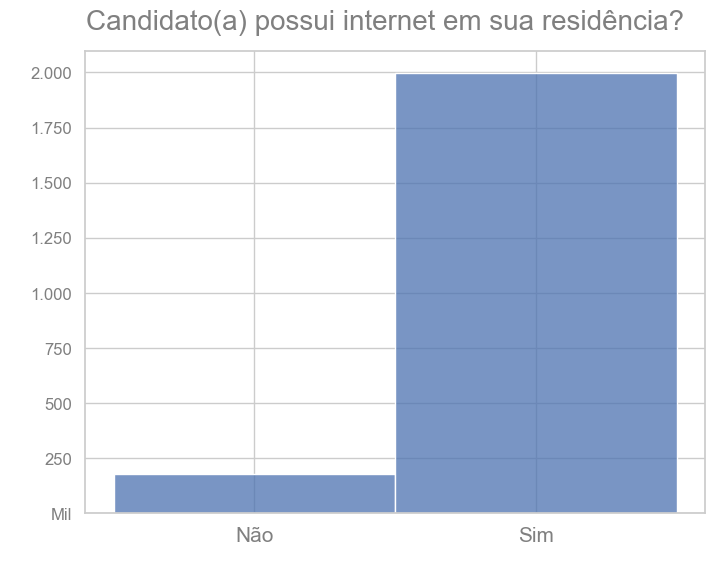

In [93]:
fig, ax = plt.subplots(figsize = (8,6))
fig.suptitle('Candidato(a) possui internet em sua residência?', color = 'grey', fontsize = 20, y = 0.95)
ax = sns.histplot(x = 'Q025', data = q025)
ax.set_xticklabels(['Não', 'Sim'], fontsize = 15, color = 'grey')
ax.set_yticklabels(['Mil','250','500','750','1.000','1.250','1.500','1.750','2.000',], fontsize = 12, color = 'grey')
ax.set_xlabel(' ')
ax.set_ylabel(' ')

[Text(0, 0.0, '0'),
 Text(0, 100.0, '100'),
 Text(0, 200.0, '200'),
 Text(0, 300.0, '300'),
 Text(0, 400.0, '400'),
 Text(0, 500.0, '500'),
 Text(0, 600.0, '600'),
 Text(0, 700.0, '700'),
 Text(0, 800.0, '800'),
 Text(0, 900.0, '900'),
 Text(0, 1000.0, '')]

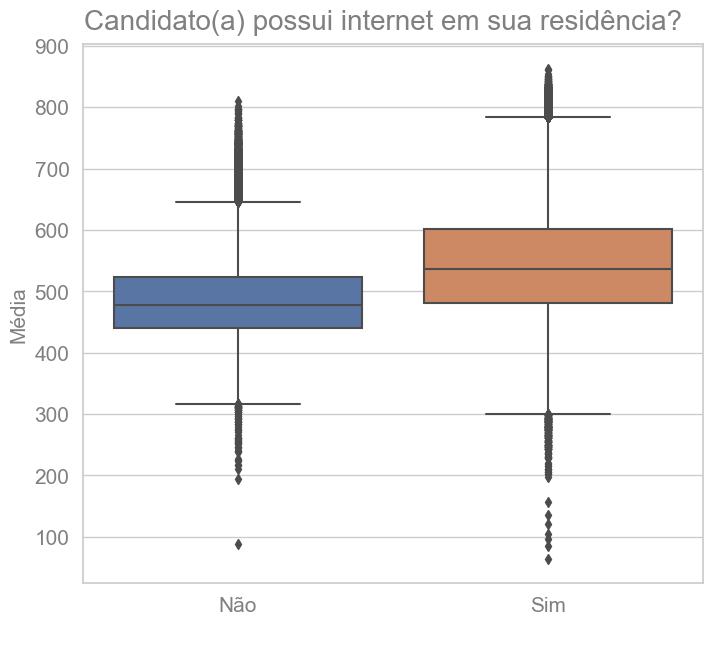

In [94]:
fig, ax = plt.subplots(figsize = (8,7))
fig.suptitle('Candidato(a) possui internet em sua residência?', color = 'grey', fontsize = 20, y = 0.93)
ax = sns.boxplot(data = q025, x = 'Q025', y = 'Média')
ax.set_xlabel(' ')
ax.set_ylabel('Média', color = 'grey', fontsize = 15)
ax.set_xticklabels(['Não','Sim'], color = 'grey', fontsize = 15)
ax.set_yticklabels(['0','100','200','300','400','500','600','700','800','900'], color = 'grey', fontsize = 15)

In [95]:
q250['Média'].mean()

485.94287424414466

In [96]:
q250['Média'].std()

63.642736910434735

In [97]:
q251['Média'].mean()

545.5583426812138

In [98]:
q251['Média'].std()

84.44290467723214

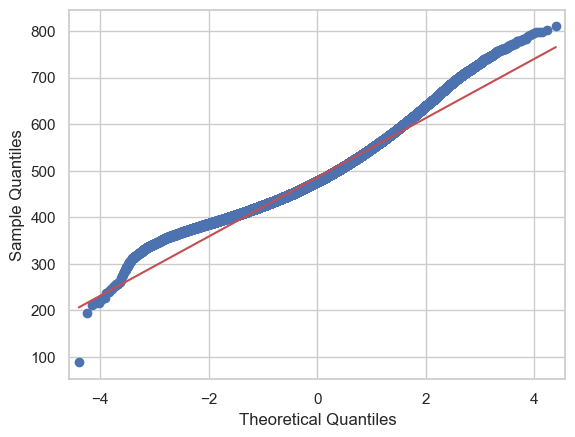

In [99]:
qqplot(q250['Média'], line = 's')
plt.show()

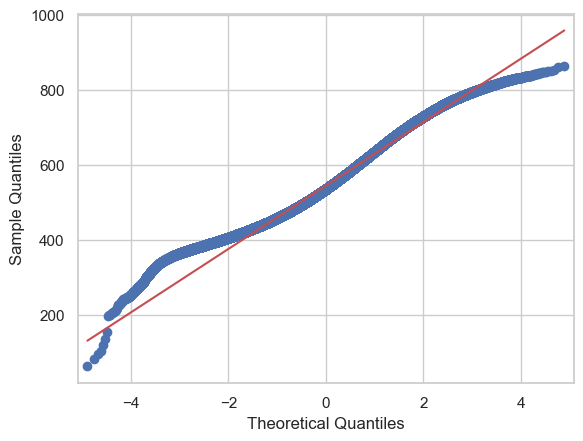

In [100]:
qqplot(q251['Média'], line = 's')
plt.show()

In [101]:
t9, p9 = stats.ttest_ind(q250['Média'], q251['Média'], alternative='less', equal_var = False)

In [102]:
t9

-368.54321544587776

In [103]:
p9

0.0

#### Obtidos T-valor e P-valor para cada comparação de amostras de candidatos com e sem acesso à internet podemos <u>rejeitar</u> a hipóstese nula